## Import libraries

In [1]:
import pandas as pd # data analytical library
import numpy as np #fast linear algebra
import matplotlib.pyplot as plt #visualization
import seaborn as sns #statistical visualization

## Reading the dataset

In [2]:
df=pd.read_csv("train_SJC.csv")

##### To display first 5 rows of the dataset

In [3]:
df.head()

,Unnamed: 0,Unnamed: 1,DateReported,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,DependentsOther,Unnamed: 8,Unnamed: 9,Unnamed: 10,DaysWorkedPerWeek,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,ClaimNumber,DateTimeOfAccident,NaN,Age,Gender,MaritalStatus,DependentChildren,NaN,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,NaN,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost
1,WC8205482,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0.0,500,F,38,5.0,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388
2,WC6922469,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0.0,509.34,F,37.5,5.0,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819
3,WC5442654,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0.0,709.1,F,38,5.0,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087
4,WC9796897,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0.0,555.46,F,38,5.0,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.48717


##### Since the headers are not named in most cases, renaming it using dictionary

In [4]:
df=df.rename(columns={"Unnamed: 0":"ClaimNumber","Unnamed: 1":"DateTimeOfAccident","Unnamed: 3":"Age","Unnamed: 4":"Gender",
                      "Unnamed: 5":"MaritalStatus","Unnamed: 6":"DependentChildren","Unnamed: 8":"WeeklyWages",
                      "Unnamed: 9":"PartTimeFullTime","Unnamed: 10":"HoursWorkedPerWeek","Unnamed: 12":"ClaimDescription",
                      "Unnamed: 13":"InitialIncurredCalimsCost","Unnamed: 14":'UltimateIncurredClaimCost'},inplace=False)

##### Header column is repeated in the first row, hence remove it using drop function and display first 5 rows

In [6]:
df=df.drop(df.index[0])
df.head()

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost
2,WC6922469,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0.0,509.34,F,37.5,5.0,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819
3,WC5442654,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0.0,709.1,F,38,5.0,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087
4,WC9796897,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0.0,555.46,F,38,5.0,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.48717
5,WC2603726,1990-08-29T08:00:00Z,1990-09-27T00:00:00Z,36,M,M,0,0.0,377.1,F,38,5.0,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800,4014.002925
6,WC6842268,1999-06-21T11:00:00Z,1999-09-09T00:00:00Z,50,M,M,0,0.0,200,F,38,5.0,STRUCK HEAD ON HEAD LACERATED HEAD,500,598.762315


## Pre-processing

##### Analysing basic descriptions of the dataset

#### Descriptive statistics using describe function

In [7]:
df.describe() # displays only for numeric columns

,DependentsOther,DaysWorkedPerWeek
count,36175.000000,36175.000000
mean,0.009537,4.905791
std,0.106164,0.547085
min,0.000000,1.000000
25%,0.000000,5.000000
50%,0.000000,5.000000
75%,0.000000,5.000000
max,3.000000,7.000000


#### To find the shape/size of the data

In [8]:
df.shape # the dataframe has 36176 rows and 17 columns

(36175, 15)

#### To find a concise summary of the dataframe using info function

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36175 entries, 2 to 36176
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ClaimNumber                36175 non-null  object 
 1   DateTimeOfAccident         36175 non-null  object 
 2   DateReported               36175 non-null  object 
 3   Age                        36175 non-null  object 
 4   Gender                     36175 non-null  object 
 5   MaritalStatus              36153 non-null  object 
 6   DependentChildren          36175 non-null  object 
 7   DependentsOther            36175 non-null  float64
 8   WeeklyWages                36119 non-null  object 
 9   PartTimeFullTime           36175 non-null  object 
 10  HoursWorkedPerWeek         36126 non-null  object 
 11  DaysWorkedPerWeek          36175 non-null  float64
 12  ClaimDescription           36175 non-null  object 
 13  InitialIncurredCalimsCost  36175 non-null  obj

#### To check the datatypes of the features

In [10]:
df.dtypes # few numeric datatypes are classified as string

ClaimNumber                   object
DateTimeOfAccident            object
DateReported                  object
Age                           object
Gender                        object
MaritalStatus                 object
DependentChildren             object
DependentsOther              float64
WeeklyWages                   object
PartTimeFullTime              object
HoursWorkedPerWeek            object
DaysWorkedPerWeek            float64
ClaimDescription              object
InitialIncurredCalimsCost     object
UltimateIncurredClaimCost     object
dtype: object

##### Converting some features that are classified as object data type to numeric for better analysis

In [11]:
df['Age'] = pd.to_numeric(df['Age'])
df['DependentChildren'] = pd.to_numeric(df['DependentChildren'])
df['WeeklyWages'] = df['WeeklyWages'].astype('float64')
df['HoursWorkedPerWeek'] = df['HoursWorkedPerWeek'].astype('float64')
df['InitialIncurredCalimsCost'] = pd.to_numeric(df['InitialIncurredCalimsCost'])
df['UltimateIncurredClaimCost'] = pd.to_numeric(df['UltimateIncurredClaimCost'])

##### To check if the datatypes are changed

In [12]:
df.dtypes

ClaimNumber                   object
DateTimeOfAccident            object
DateReported                  object
Age                            int64
Gender                        object
MaritalStatus                 object
DependentChildren              int64
DependentsOther              float64
WeeklyWages                  float64
PartTimeFullTime              object
HoursWorkedPerWeek           float64
DaysWorkedPerWeek            float64
ClaimDescription              object
InitialIncurredCalimsCost      int64
UltimateIncurredClaimCost    float64
dtype: object

## Missing value analysis and treatment

### Finding which columns have missing values

In [13]:
df.isnull().sum()

ClaimNumber                   0
DateTimeOfAccident            0
DateReported                  0
Age                           0
Gender                        0
MaritalStatus                22
DependentChildren             0
DependentsOther               0
WeeklyWages                  56
PartTimeFullTime              0
HoursWorkedPerWeek           49
DaysWorkedPerWeek             0
ClaimDescription              0
InitialIncurredCalimsCost     0
UltimateIncurredClaimCost     0
dtype: int64

#### checking the type of data of missing value columns

In [14]:
df['MaritalStatus'].value_counts() # categorical

MaritalStatus
S    17450
M    15161
U     3542
Name: count, dtype: int64

In [15]:
df['WeeklyWages'].value_counts() # continuous

WeeklyWages
200.00     8220
500.00     2822
300.00      374
400.00      264
350.00      239
           ... 
259.72        1
281.26        1
425.06        1
237.19        1
1668.83       1
Name: count, Length: 10468, dtype: int64

In [16]:
df['HoursWorkedPerWeek'].value_counts() # continuous

HoursWorkedPerWeek
38.00     20651
40.00      8903
20.00       571
30.00       562
35.00       500
          ...  
27.46         1
56.10         1
33.20         1
638.00        1
58.02         1
Name: count, Length: 355, dtype: int64

#### Treatment

##### Classifying the missing marital status as unknown

In [17]:
df['MaritalStatus'] = df['MaritalStatus'].fillna('U')

##### Performing mean imputation on HoursWorkedPerWeek(continuous) data

<Axes: xlabel='HoursWorkedPerWeek', ylabel='Density'>

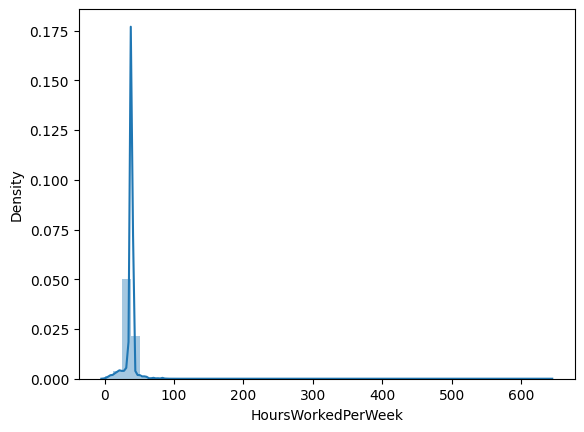

In [19]:
import warnings
warnings.filterwarnings('ignore')

sns.distplot(df['HoursWorkedPerWeek']) # Mean becuase data is not skewed

In [20]:
df['HoursWorkedPerWeek']=df['HoursWorkedPerWeek'].fillna(df['HoursWorkedPerWeek'].mean())

##### Classifying the missing WeeklyWages with median

<Axes: xlabel='WeeklyWages', ylabel='Density'>

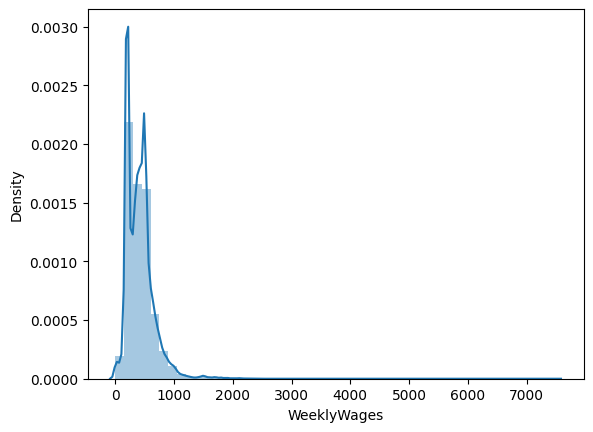

In [21]:
sns.distplot(df['WeeklyWages']) # Median because data is skewed slightly

In [22]:
df['WeeklyWages']=df['WeeklyWages'].fillna(df['WeeklyWages'].median())

##### Verify if there are no missing values

In [23]:
df.isnull().sum()

ClaimNumber                  0
DateTimeOfAccident           0
DateReported                 0
Age                          0
Gender                       0
MaritalStatus                0
DependentChildren            0
DependentsOther              0
WeeklyWages                  0
PartTimeFullTime             0
HoursWorkedPerWeek           0
DaysWorkedPerWeek            0
ClaimDescription             0
InitialIncurredCalimsCost    0
UltimateIncurredClaimCost    0
dtype: int64

In [24]:
df.dtypes

ClaimNumber                   object
DateTimeOfAccident            object
DateReported                  object
Age                            int64
Gender                        object
MaritalStatus                 object
DependentChildren              int64
DependentsOther              float64
WeeklyWages                  float64
PartTimeFullTime              object
HoursWorkedPerWeek           float64
DaysWorkedPerWeek            float64
ClaimDescription              object
InitialIncurredCalimsCost      int64
UltimateIncurredClaimCost    float64
dtype: object

## Data Tranformation

#### Transforming DateTimeOfAccident to datetime datatype

In [25]:
df['DateTimeOfAccident']

2        1999-01-07T11:00:00Z
3        1996-03-25T00:00:00Z
4        2005-06-22T13:00:00Z
5        1990-08-29T08:00:00Z
6        1999-06-21T11:00:00Z
                 ...         
36172    1996-05-29T09:00:00Z
36173    2002-10-08T08:00:00Z
36174    1999-09-22T09:00:00Z
36175    1993-02-05T06:00:00Z
36176    1998-03-06T10:00:00Z
Name: DateTimeOfAccident, Length: 36175, dtype: object

In [26]:
df['DateTimeOfAccident']=pd.to_datetime(df['DateTimeOfAccident'])

In [27]:
df.dtypes 

ClaimNumber                               object
DateTimeOfAccident           datetime64[ns, UTC]
DateReported                              object
Age                                        int64
Gender                                    object
MaritalStatus                             object
DependentChildren                          int64
DependentsOther                          float64
WeeklyWages                              float64
PartTimeFullTime                          object
HoursWorkedPerWeek                       float64
DaysWorkedPerWeek                        float64
ClaimDescription                          object
InitialIncurredCalimsCost                  int64
UltimateIncurredClaimCost                float64
dtype: object

##### Retaining only the year of accident from date-time

In [28]:
df['YearOfAccident']=pd.to_datetime(df['DateTimeOfAccident']).dt.year

In [29]:
df['YearOfAccident']

2        1999
3        1996
4        2005
5        1990
6        1999
         ... 
36172    1996
36173    2002
36174    1999
36175    1993
36176    1998
Name: YearOfAccident, Length: 36175, dtype: int32

##### to check if the yearOfAccident column is created

In [30]:
df.head() 

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost,YearOfAccident
2,WC6922469,1999-01-07 11:00:00+00:00,1999-01-20T00:00:00Z,43,F,M,0,0.0,509.34,F,37.5,5.0,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819,1999
3,WC5442654,1996-03-25 00:00:00+00:00,1996-04-14T00:00:00Z,30,M,U,0,0.0,709.10,F,38.0,5.0,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087,1996
4,WC9796897,2005-06-22 13:00:00+00:00,2005-07-22T00:00:00Z,41,M,S,0,0.0,555.46,F,38.0,5.0,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.487170,2005
5,WC2603726,1990-08-29 08:00:00+00:00,1990-09-27T00:00:00Z,36,M,M,0,0.0,377.10,F,38.0,5.0,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800,4014.002925,1990
6,WC6842268,1999-06-21 11:00:00+00:00,1999-09-09T00:00:00Z,50,M,M,0,0.0,200.00,F,38.0,5.0,STRUCK HEAD ON HEAD LACERATED HEAD,500,598.762315,1999


#### Binning

##### Binning the age column

In [31]:
df['Age_Bin']=pd.cut(df['Age'],bins=3)
df['Age_Bin']

2          (35.0, 57.0]
3        (12.934, 35.0]
4          (35.0, 57.0]
5          (35.0, 57.0]
6          (35.0, 57.0]
              ...      
36172    (12.934, 35.0]
36173    (12.934, 35.0]
36174      (35.0, 57.0]
36175    (12.934, 35.0]
36176    (12.934, 35.0]
Name: Age_Bin, Length: 36175, dtype: category
Categories (3, interval[float64, right]): [(12.934, 35.0] < (35.0, 57.0] < (57.0, 79.0]]

In [32]:
df['Age_Bin']=pd.cut(df['Age'],bins=[12,35,57,80] , labels=['Youth','Adult','Senior_Citizen'])
df['Age_Bin']

2        Adult
3        Youth
4        Adult
5        Adult
6        Adult
         ...  
36172    Youth
36173    Youth
36174    Adult
36175    Youth
36176    Youth
Name: Age_Bin, Length: 36175, dtype: category
Categories (3, object): ['Youth' < 'Adult' < 'Senior_Citizen']

##### Bining Initial Incurred Calims Cost into Rankings based on the cost to show the value of it

In [33]:
df['Rating'] = pd.cut(df['InitialIncurredCalimsCost'],bins=[0,3500,7000,9500,12000,18000],labels=['1','2','3','4','5'])
df['Rating']

2        2
3        1
4        5
5        1
6        1
        ..
36172    1
36173    1
36174    1
36175    2
36176    1
Name: Rating, Length: 36175, dtype: category
Categories (5, object): ['1' < '2' < '3' < '4' < '5']

## Exploratory Data Analysis

#### Statistical Analysis

In [34]:
cat_data=df.select_dtypes(include=object)
cat_data.columns

Index(['ClaimNumber', 'DateReported', 'Gender', 'MaritalStatus',
       'PartTimeFullTime', 'ClaimDescription'],
      dtype='object')

In [35]:
num_data=df.select_dtypes(exclude=object)
num_data.columns

Index(['DateTimeOfAccident', 'Age', 'DependentChildren', 'DependentsOther',
       'WeeklyWages', 'HoursWorkedPerWeek', 'DaysWorkedPerWeek',
       'InitialIncurredCalimsCost', 'UltimateIncurredClaimCost',
       'YearOfAccident', 'Age_Bin', 'Rating'],
      dtype='object')

In [36]:
num_data.describe()

,Age,DependentChildren,DependentsOther,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredCalimsCost,UltimateIncurredClaimCost,YearOfAccident
count,36175.000000,36175.000000,36175.000000,36175.000000,36175.000000,36175.000000,36175.000000,3.617500e+04,36175.000000
mean,33.794803,0.121299,0.009537,416.433247,37.766813,4.905791,7743.766469,1.095300e+04,1996.497167
std,12.114666,0.525402,0.106164,243.691202,12.486031,0.547085,18223.920851,3.529661e+04,5.184871
min,13.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.218868e+02,1988.000000
25%,23.000000,0.000000,0.000000,200.000000,38.000000,5.000000,700.000000,9.256558e+02,1992.000000
50%,32.000000,0.000000,0.000000,393.300000,38.000000,5.000000,2000.000000,3.373665e+03,1996.000000
75%,43.000000,0.000000,0.000000,500.000000,40.000000,5.000000,9500.000000,8.187160e+03,2001.000000
max,79.000000,9.000000,3.000000,7497.000000,640.000000,7.000000,830000.000000,4.027136e+06,2005.000000


In [37]:
cat_data.describe()

,ClaimNumber,DateReported,Gender,MaritalStatus,PartTimeFullTime,ClaimDescription
count,36175,36175,36175,36175,36175,36175
unique,29455,6583,3,3,2,20595
top,WC7301773,2001-03-29T00:00:00Z,M,S,F,SLIPPED ON ROLLER TENDONITIS RIGHT SHOULDER
freq,6,19,27918,17450,32916,218


In [38]:
df.apply(pd.Series.nunique)

ClaimNumber                  29455
DateTimeOfAccident           27549
DateReported                  6583
Age                             65
Gender                           3
MaritalStatus                    3
DependentChildren                9
DependentsOther                  4
WeeklyWages                  10468
PartTimeFullTime                 2
HoursWorkedPerWeek             356
DaysWorkedPerWeek                7
ClaimDescription             20595
InitialIncurredCalimsCost     1600
UltimateIncurredClaimCost    36175
YearOfAccident                  18
Age_Bin                          3
Rating                           5
dtype: int64

### Univariate Analysis

##### Analysing the count of different discrete features using count plot

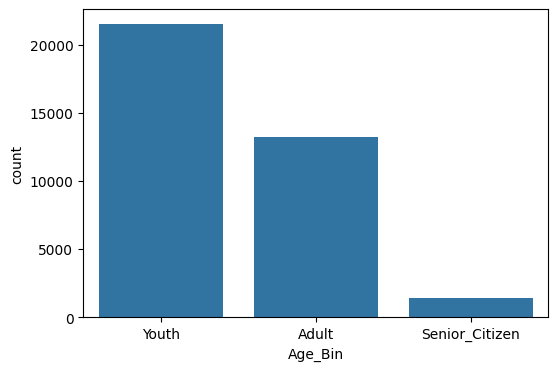

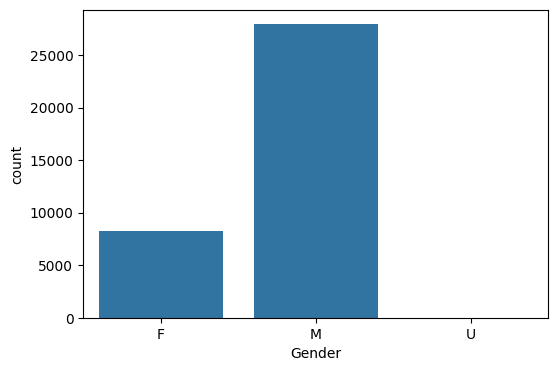

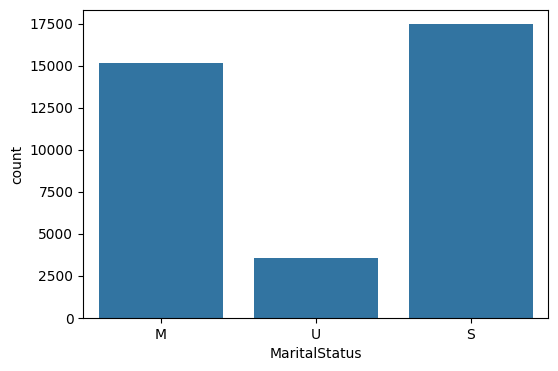

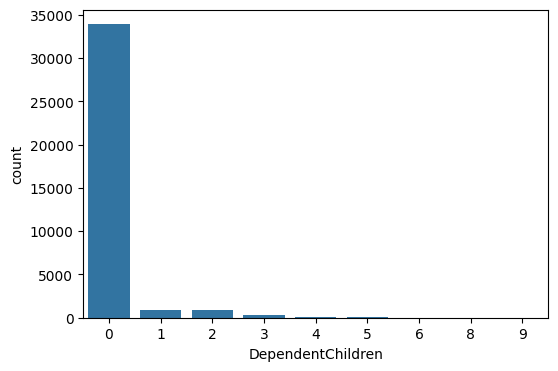

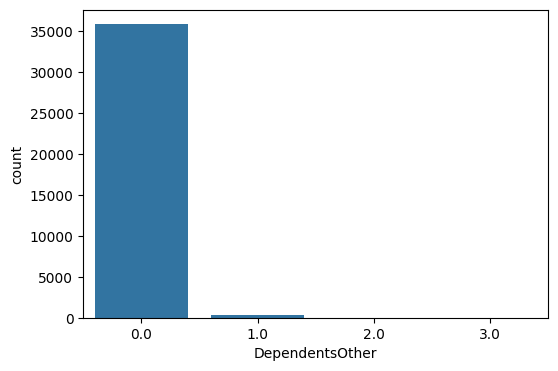

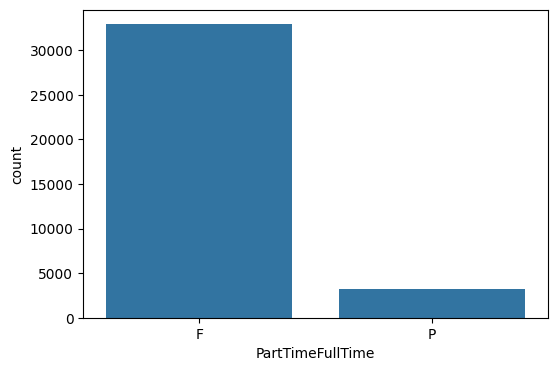

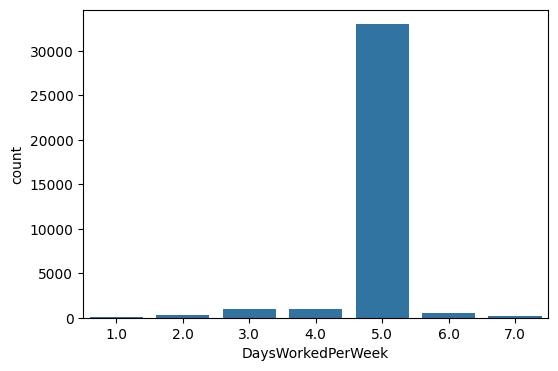

In [39]:
univariate=['Age_Bin','Gender','MaritalStatus','DependentChildren','DependentsOther','PartTimeFullTime','DaysWorkedPerWeek']
for col in univariate:
    plt.figure(figsize = (6,4))
    sns.countplot(x=col,data =df)

##### From the above plots we can infer the following
1. Youth have applied the most for insurance
2. Number of Males who applied for insurance are way higher than females
3. The marital status for most of the insurance holders are single
4. Most of them do not have children or dependencies
5. full time workers have applied more for the policy
6. Among those who applied, most of them work 5 days a week


##### Viewing the distribution of target variable using dist plot

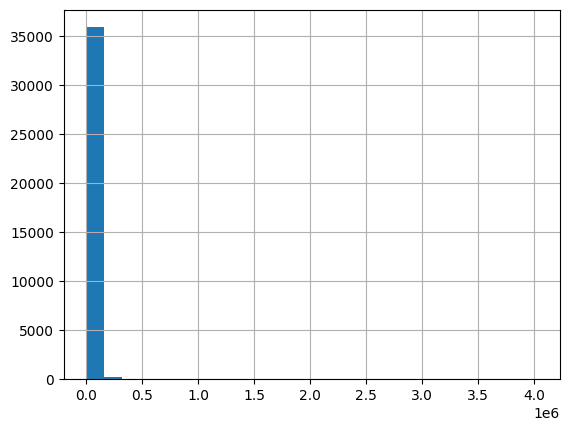

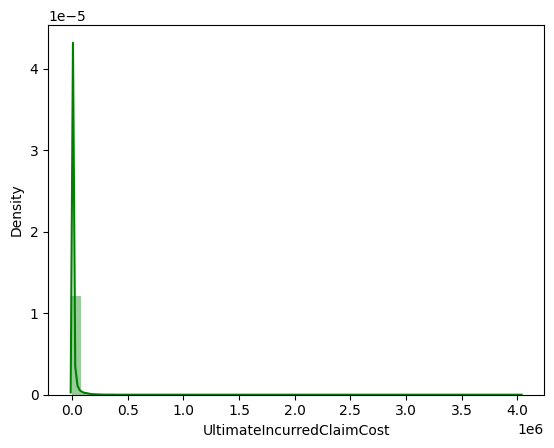

<Axes: ylabel='UltimateIncurredClaimCost'>

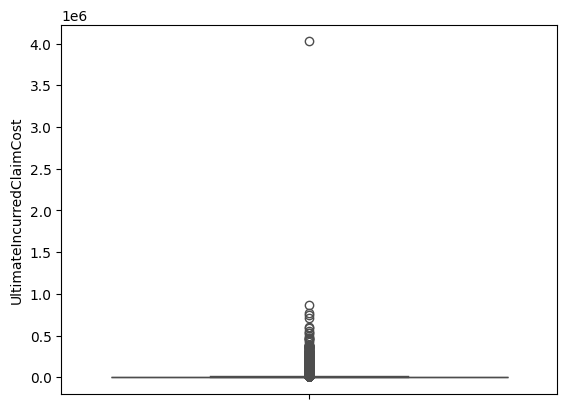

In [41]:
df['UltimateIncurredClaimCost'].hist(bins=25)
plt.show()
sns.distplot(df['UltimateIncurredClaimCost'],color='g')
plt.show()
sns.boxplot(df['UltimateIncurredClaimCost'],color='r')

##### From the above 3 plots , namely histogram, distplot and boxplot we can infer the target variable is highly poitively skewed

### Bivariate Analysis

In [42]:
log_UltimateIncurredClaimCost=np.log(df['UltimateIncurredClaimCost'])

<Axes: xlabel='Gender', ylabel='UltimateIncurredClaimCost'>

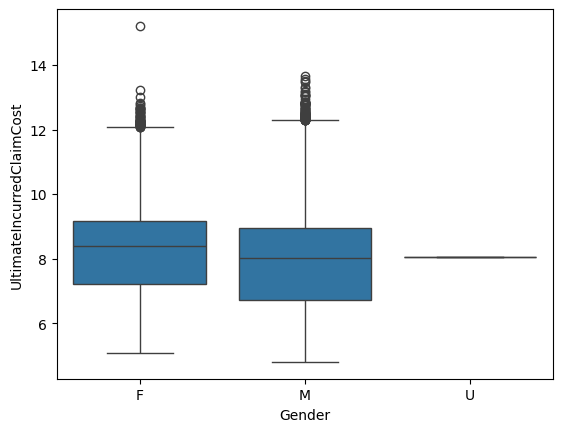

In [43]:
sns.boxplot(x = 'Gender', y = log_UltimateIncurredClaimCost,  data =df)

##### Average incurred claims cost female are the higer amount than male

Bar plots

<Axes: xlabel='PartTimeFullTime', ylabel='UltimateIncurredClaimCost'>

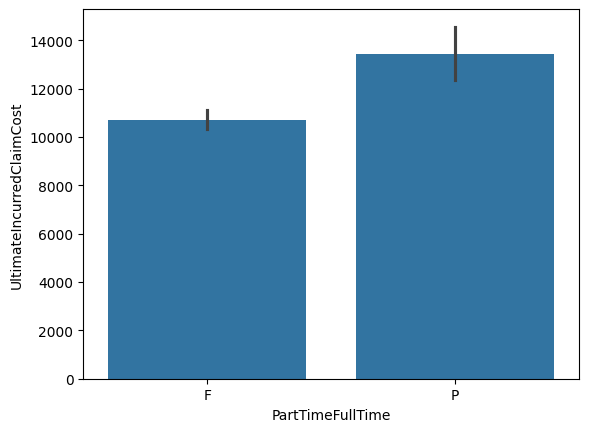

In [44]:
sns.barplot(x='PartTimeFullTime',y='UltimateIncurredClaimCost',data=df)

##### Part time workers have got higher insurance

<Axes: xlabel='DaysWorkedPerWeek', ylabel='UltimateIncurredClaimCost'>

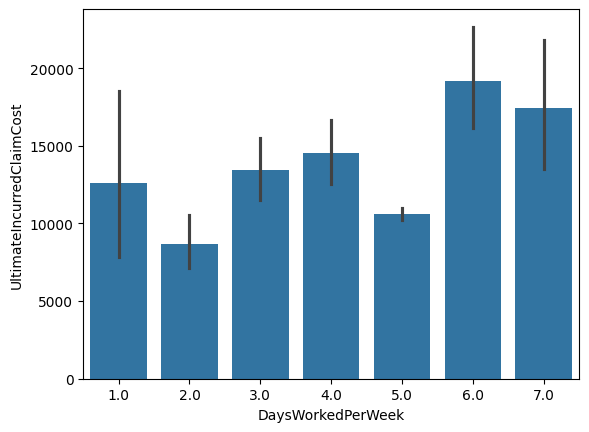

In [45]:
sns.barplot(x='DaysWorkedPerWeek',y='UltimateIncurredClaimCost',data=df)

##### people working 6 days a week have got higher insurance

<Axes: xlabel='Age_Bin', ylabel='UltimateIncurredClaimCost'>

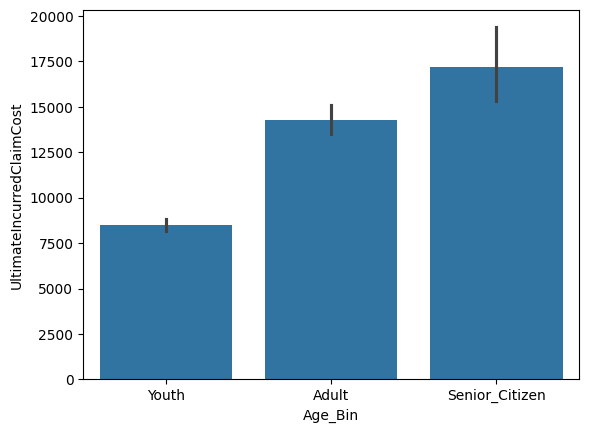

In [46]:
sns.barplot(x='Age_Bin',y='UltimateIncurredClaimCost',data=df)

##### Senior citizens have got highest insurance, as the age increases the insurance also increases

<Axes: xlabel='YearOfAccident', ylabel='UltimateIncurredClaimCost'>

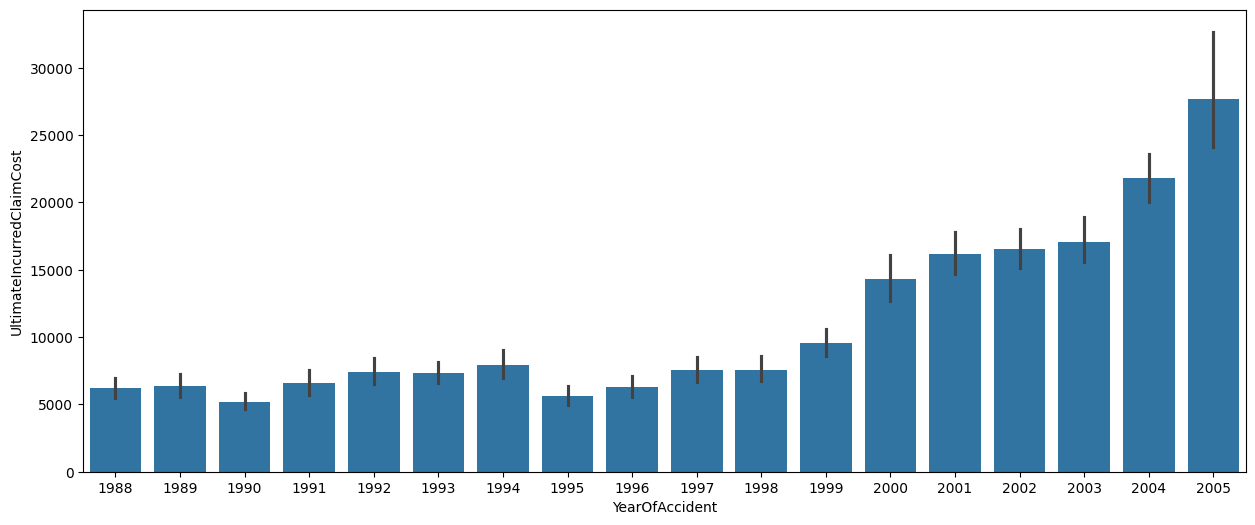

In [47]:
plt.figure(figsize=(15,6))
sns.barplot(x='YearOfAccident',y='UltimateIncurredClaimCost',data=df)

##### As the year increases the amount given as insurance also increases

### Multivariate analysis

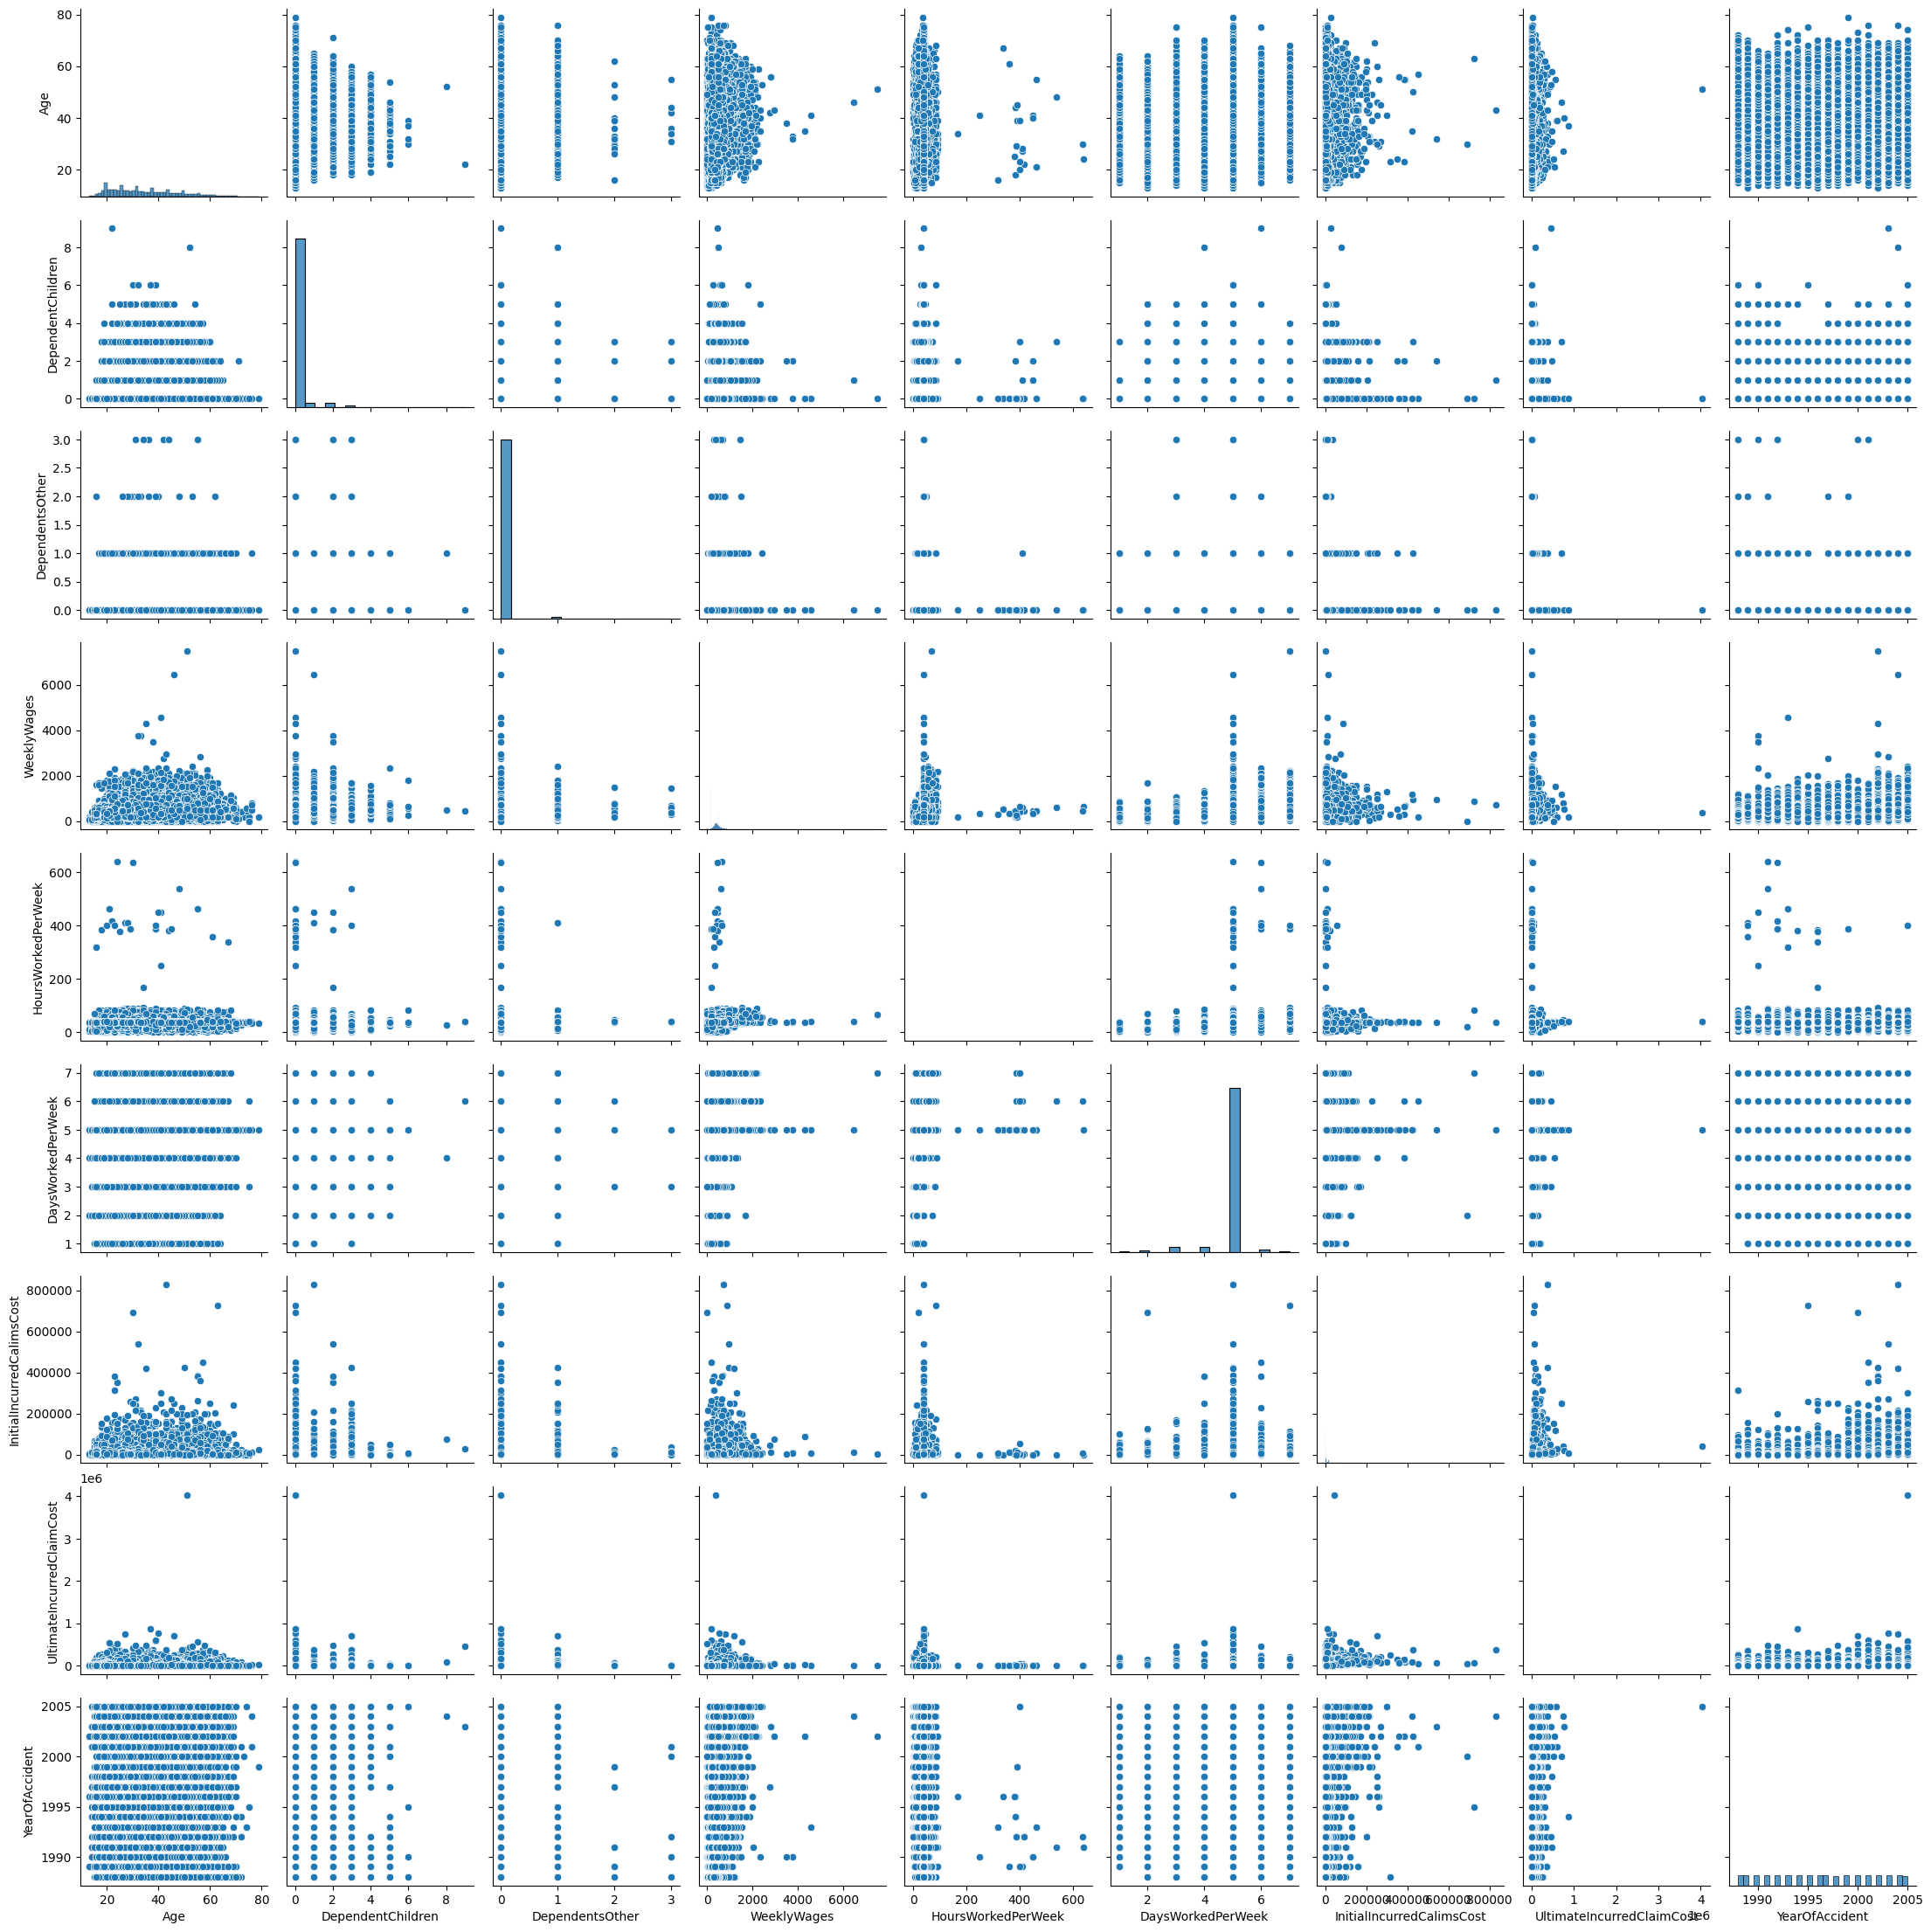

In [48]:
sns.pairplot(df)

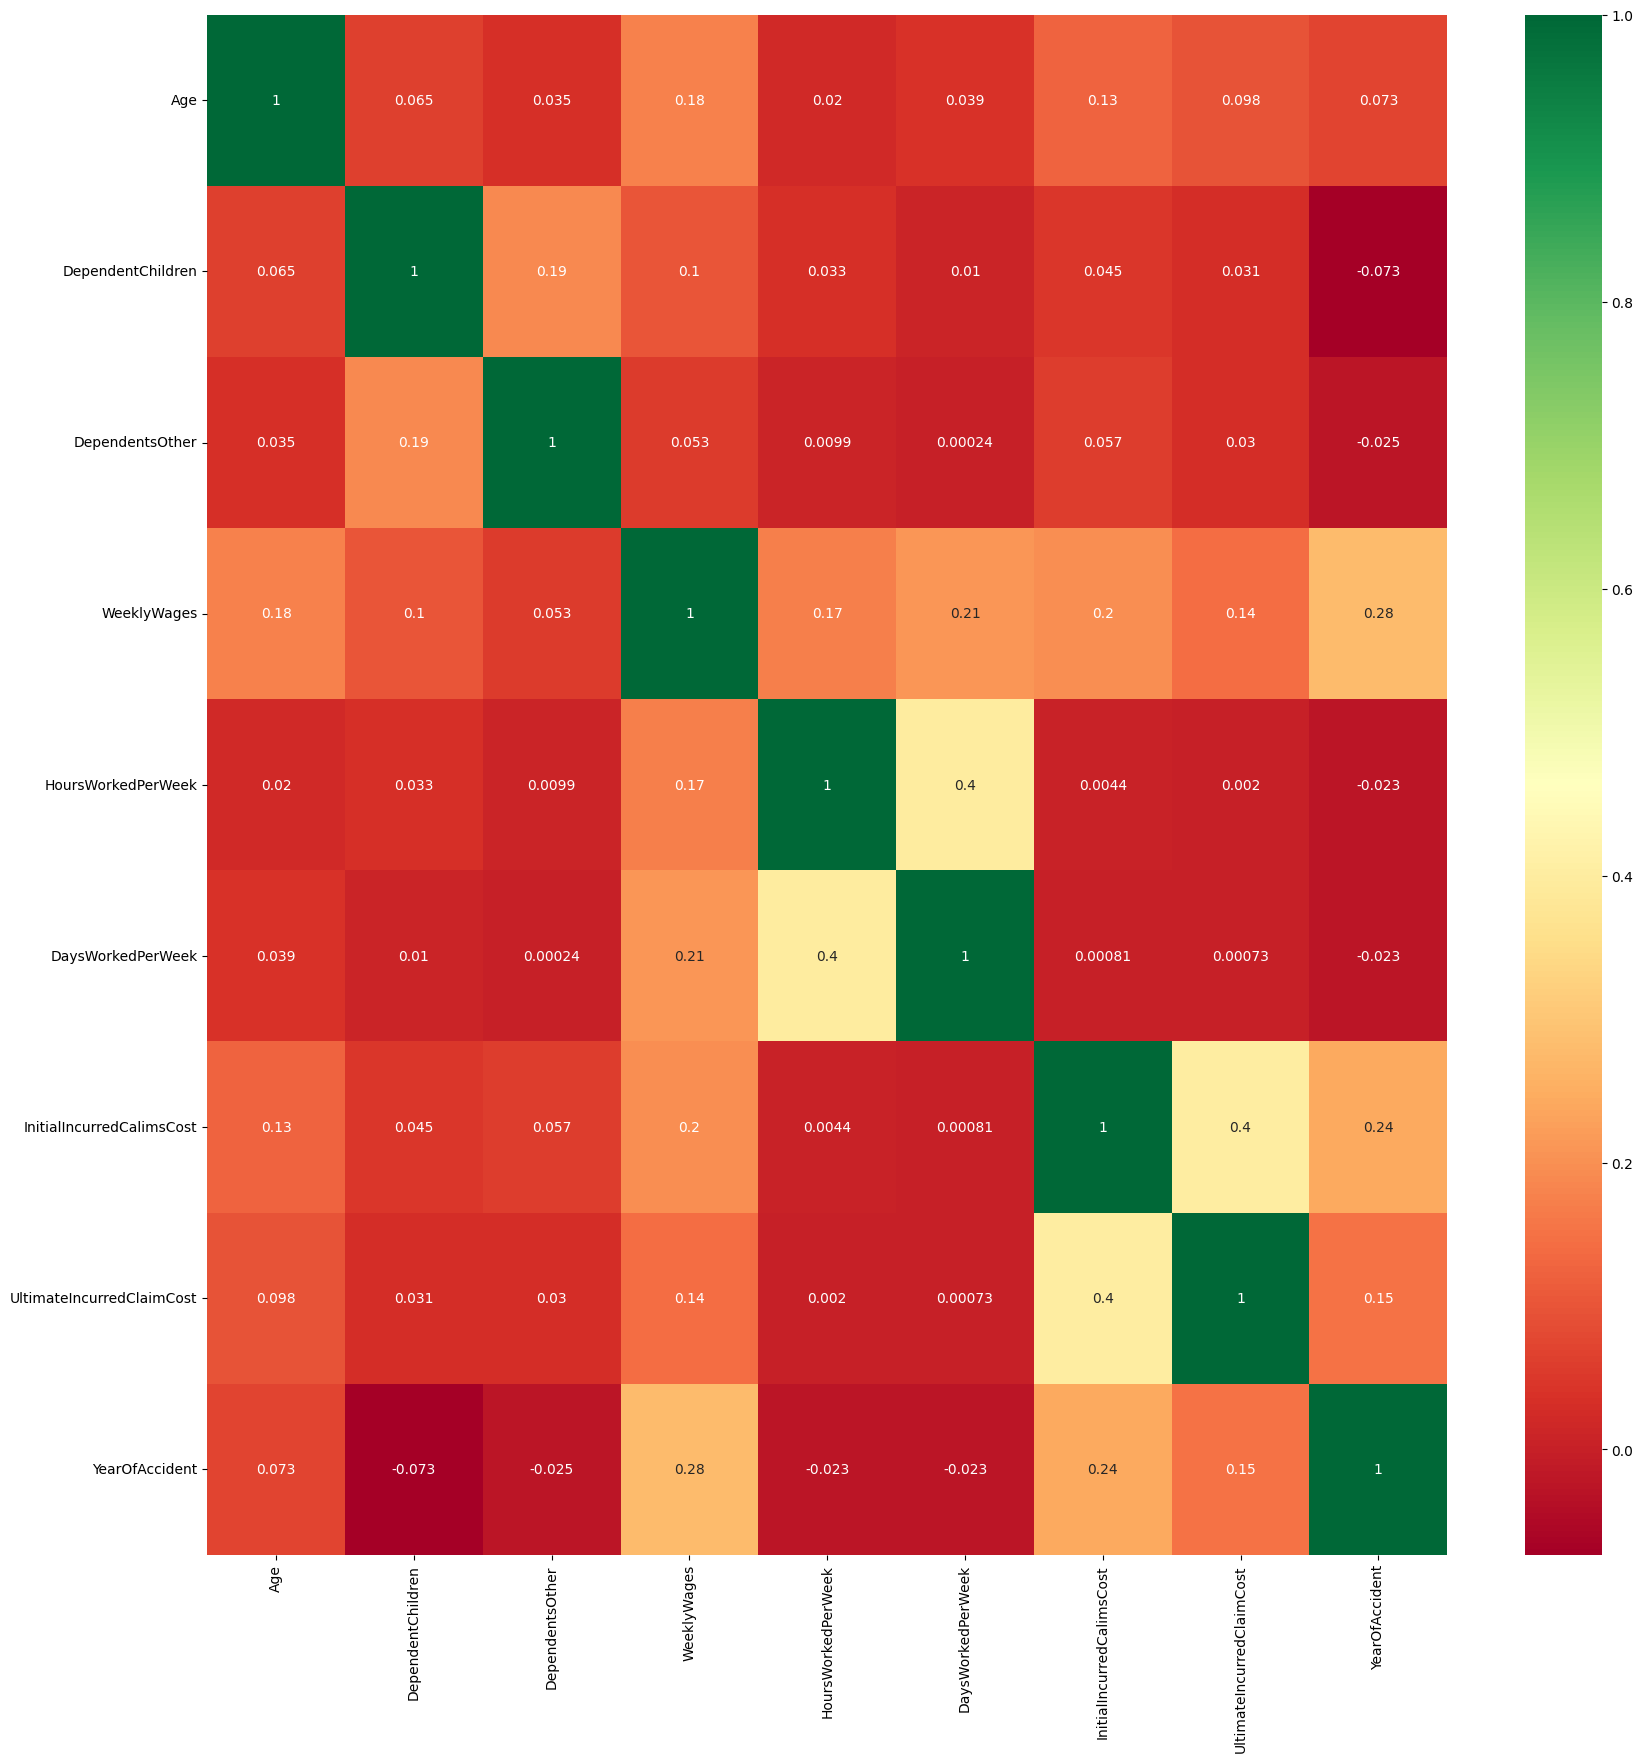

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
corrmat = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corrmat, annot=True, cmap="RdYlGn")
plt.show()


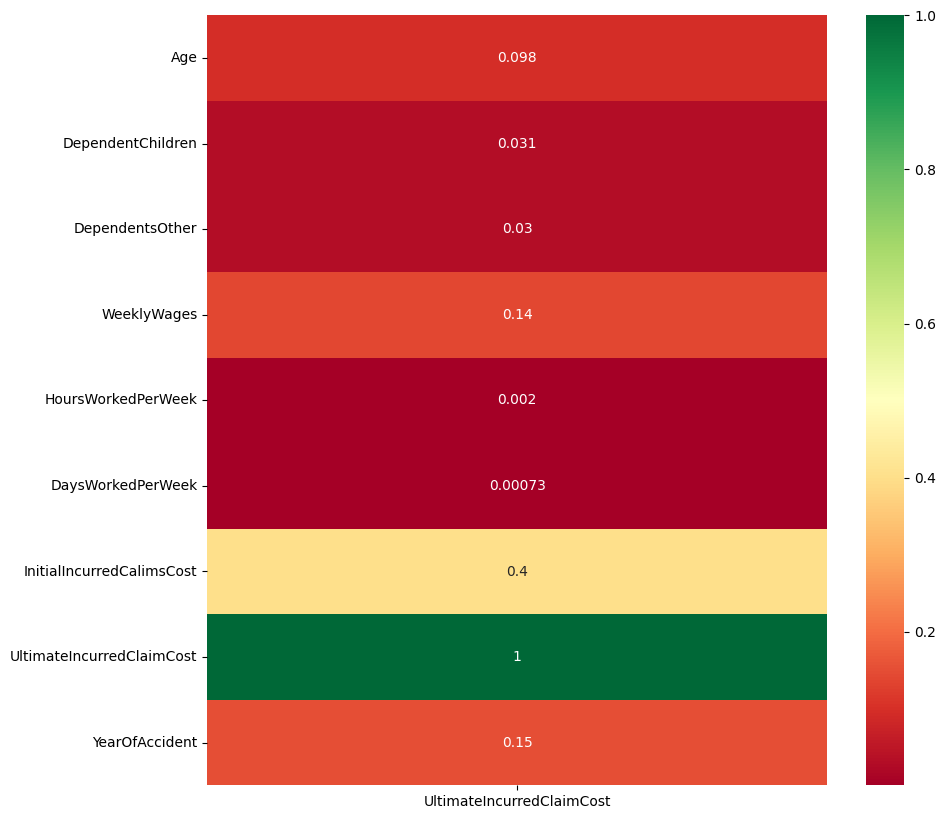

In [49]:


# keep only numeric columns
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10,10))
sns.heatmap(numeric_df.corr()[['UltimateIncurredClaimCost']], annot=True, cmap='RdYlGn')
plt.show()


##### From the above 3 plots we can infer that the most important feature responsible for predicting the ultimateIncurredClainCost is  InitiaIncurredClaimCost 

### Outlier Analysis and treatment

<Axes: >

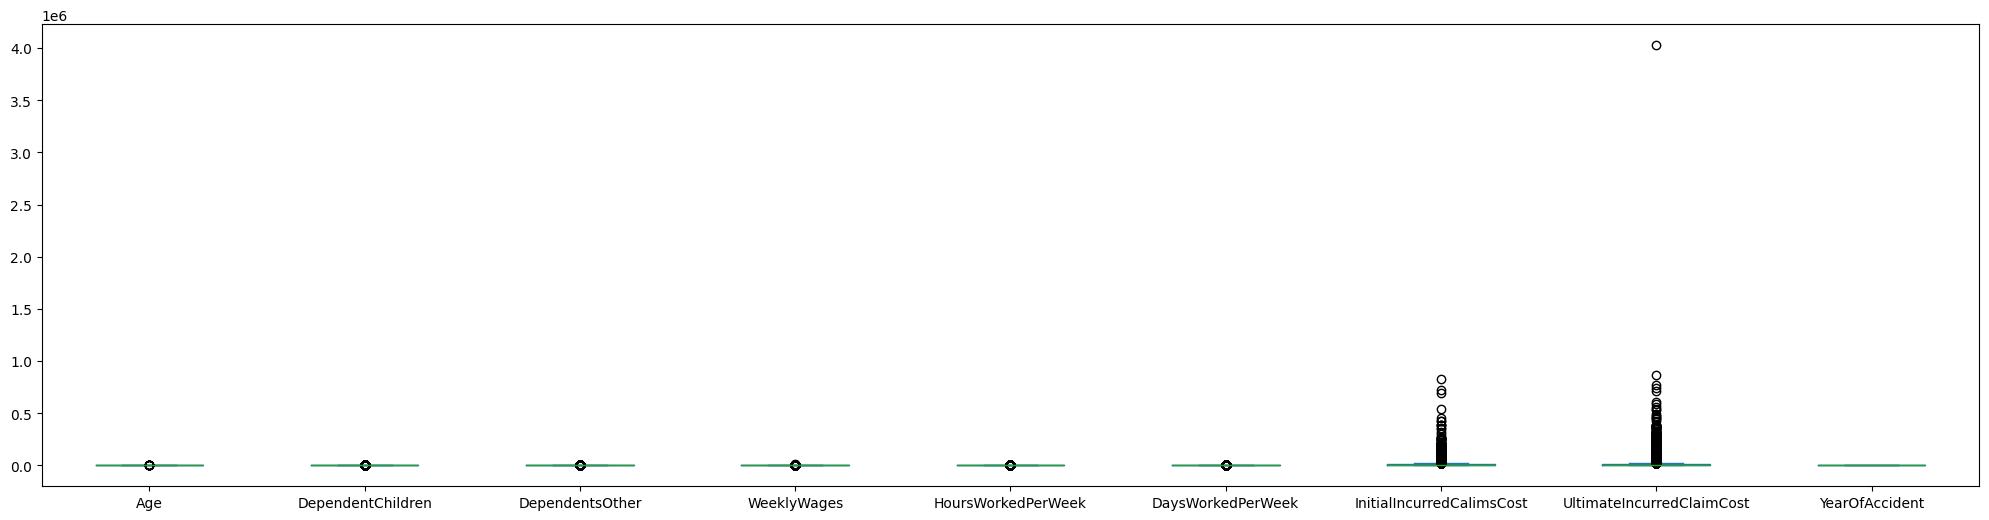

In [50]:
df.plot.box(figsize=(25,6))

In [49]:
for i in range(4):

    limit=3*df['InitialIncurredCalimsCost'].std()

    lower_limit=df['InitialIncurredCalimsCost'].mean()-limit
    upper_limit=df['InitialIncurredCalimsCost'].mean()+limit

    df=df[(df['InitialIncurredCalimsCost']>lower_limit)&(df['InitialIncurredCalimsCost']<upper_limit)]

    limit=3*df['UltimateIncurredClaimCost'].std()

    lower_limit=df['UltimateIncurredClaimCost'].mean()-limit
    upper_limit=df['UltimateIncurredClaimCost'].mean()+limit

    df=df[(df['UltimateIncurredClaimCost']>lower_limit)&(df['UltimateIncurredClaimCost']<upper_limit)]

<Axes: >

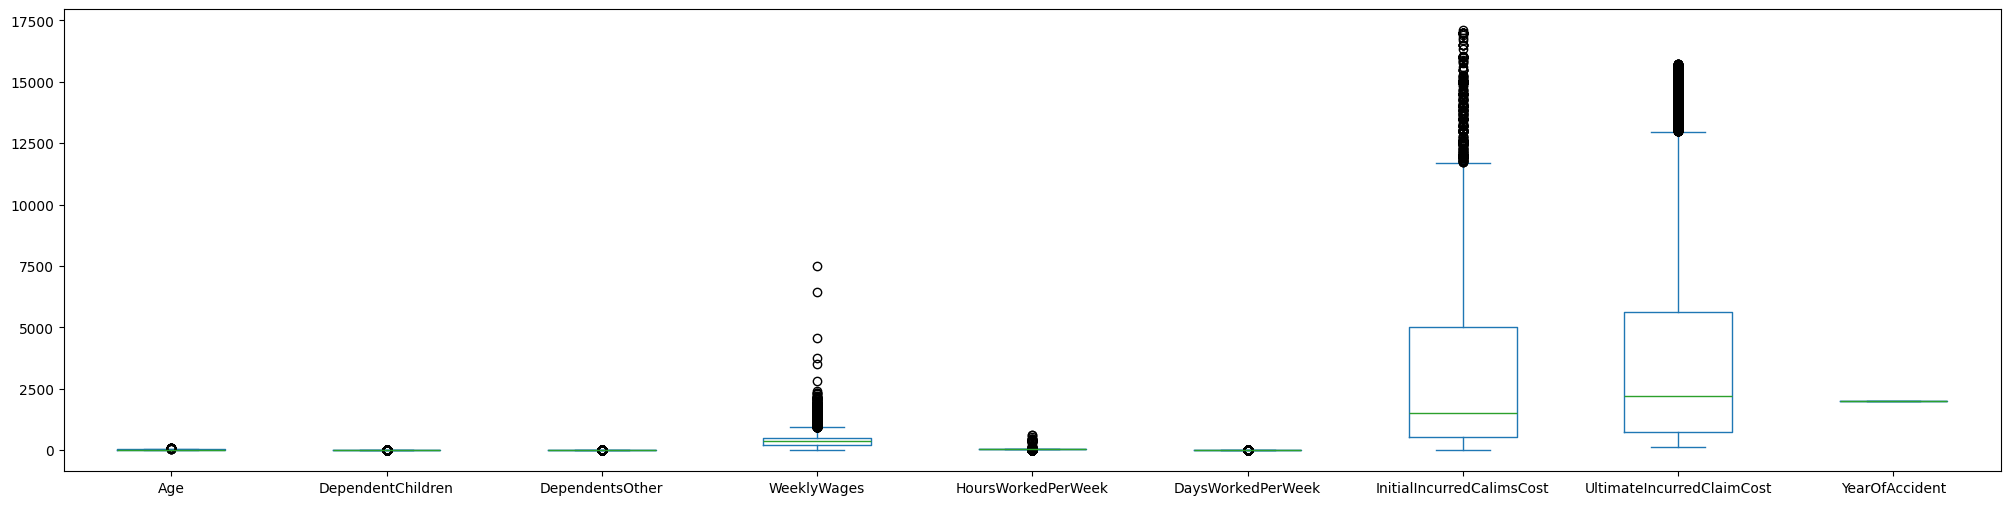

In [50]:
df.plot.box(figsize=(25,6))

## Model Building

##### Separating the response and predictor variables

In [51]:
response=df['UltimateIncurredClaimCost']
response 

1        4748.203388
2        6326.285819
3        2293.949087
5        4014.002925
6         598.762315
            ...     
36171    7914.441586
36172    1343.054886
36174     632.281472
36175    6714.495760
36176    2588.845117
Name: UltimateIncurredClaimCost, Length: 30537, dtype: float64

In [52]:
features=['ClaimNumber', 'DateReported', 'Age', 'Gender',
          'MaritalStatus', 'DependentChildren', 'DependentsOther', 'WeeklyWages',
          'PartTimeFullTime', 'HoursWorkedPerWeek', 'DaysWorkedPerWeek',
          'ClaimDescription', 'InitialIncurredCalimsCost']
pred=df[features]
pred

,ClaimNumber,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost
1,WC8205482,2002-07-05T00:00:00Z,48,M,M,0,0.0,500.00,F,38.0,5.0,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500
2,WC6922469,1999-01-20T00:00:00Z,43,F,M,0,0.0,509.34,F,37.5,5.0,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500
3,WC5442654,1996-04-14T00:00:00Z,30,M,U,0,0.0,709.10,F,38.0,5.0,CUT ON SHARP EDGE CUT LEFT THUMB,1700
5,WC2603726,1990-09-27T00:00:00Z,36,M,M,0,0.0,377.10,F,38.0,5.0,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800
6,WC6842268,1999-09-09T00:00:00Z,50,M,M,0,0.0,200.00,F,38.0,5.0,STRUCK HEAD ON HEAD LACERATED HEAD,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36171,WC5476154,1996-06-25T00:00:00Z,21,M,S,0,0.0,456.00,F,38.0,5.0,DUST FROM AREA LODGED IN RIGHT HAND,13000
36172,WC5624756,1996-06-27T00:00:00Z,20,F,S,0,0.0,344.16,F,40.0,5.0,WALKED INTO DOOR BRUISED LEFT KNEE PAIN,1400
36174,WC6891668,1999-11-11T00:00:00Z,52,F,M,0,0.0,204.87,P,20.0,4.0,REMOVING BROKEN GLASS LACERATED LEFT THUMB,500
36175,WC4287842,1993-03-19T00:00:00Z,28,M,M,0,0.0,730.87,F,38.0,5.0,FELL OVER SPRAINED ANKLE AND KNEE INJURY,4000


## Linear Regression

In [54]:
def linear_regression(data):
    
    from sklearn.linear_model import LinearRegression
    import sklearn.preprocessing as pre
    from sklearn.preprocessing import LabelEncoder
    label_en = LabelEncoder()
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error
    import numpy as np
    import pandas as pd

    assignment_dict = []
    
    X_scale = data.drop(['UltimateIncurredClaimCost'], axis='columns')
    cat_df = X_scale.select_dtypes(exclude=[float, int]).columns
    for i in cat_df:
        X_scale[str(i)] = label_en.fit_transform(X_scale[str(i)])
    X_scale = X_scale.apply(pre.minmax_scale)
    Y = data['UltimateIncurredClaimCost']
    
    X = X_scale.copy()
    n = len(X_scale.columns)
    upper_index = 3
    lower_index = 0
    
    while upper_index <= n:
        X_scale = X.drop(X.columns[lower_index:upper_index], axis='columns')
        x_train, x_test, y_train, y_test = train_test_split(
            X_scale, Y, test_size=0.3, random_state=1234456
        )
        dropped_cols = X.columns[lower_index:upper_index]
        
        glm = LinearRegression()
        glm.fit(x_train, y_train)
        y_pred = glm.predict(x_test)
        
        assignment_dict.append({
            'features': X_scale.columns,
            'Number of features': len(X_scale.columns),
            'dropped_features': dropped_cols,
            'train_score': glm.score(x_train, y_train),
            'test_score': glm.score(x_test, y_test),
            'rmse': np.sqrt(mean_squared_error(y_test, y_pred))
        })
        
        upper_index += 3
        lower_index += 3
    
    dataframe = pd.DataFrame(assignment_dict)
    assignment = dataframe.style.set_caption("Train and test scores for different features")
    pd.set_option('display.max_colwidth', None)
    
    return assignment

linear_regression(df)


/Users/saitejaboda/venv/lib/python3.12/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/saitejaboda/venv/lib/python3.12/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/saitejaboda/venv/lib/python3.12/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/saitejaboda/venv/lib/python3.12/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/saitejaboda/venv/lib/python3.12/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/saitejaboda/venv/lib/python3.12/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encou

,features,Number of features,dropped_features,train_score,test_score,rmse
0,"Index(['Age', 'Gender', 'MaritalStatus', 'DependentChildren', 'DependentsOther', 'WeeklyWages', 'PartTimeFullTime', 'HoursWorkedPerWeek', 'DaysWorkedPerWeek', 'ClaimDescription', 'InitialIncurredCalimsCost', 'YearOfAccident', 'Age_Bin', 'Rating'], dtype='object')",14,"Index(['ClaimNumber', 'DateTimeOfAccident', 'DateReported'], dtype='object')",0.717789,0.730973,1774.458846
1,"Index(['ClaimNumber', 'DateTimeOfAccident', 'DateReported', 'DependentChildren', 'DependentsOther', 'WeeklyWages', 'PartTimeFullTime', 'HoursWorkedPerWeek', 'DaysWorkedPerWeek', 'ClaimDescription', 'InitialIncurredCalimsCost', 'YearOfAccident', 'Age_Bin', 'Rating'], dtype='object')",14,"Index(['Age', 'Gender', 'MaritalStatus'], dtype='object')",0.718509,0.730722,1775.287177
2,"Index(['ClaimNumber', 'DateTimeOfAccident', 'DateReported', 'Age', 'Gender', 'MaritalStatus', 'PartTimeFullTime', 'HoursWorkedPerWeek', 'DaysWorkedPerWeek', 'ClaimDescription', 'InitialIncurredCalimsCost', 'YearOfAccident', 'Age_Bin', 'Rating'], dtype='object')",14,"Index(['DependentChildren', 'DependentsOther', 'WeeklyWages'], dtype='object')",0.704286,0.719128,1813.100579
3,"Index(['ClaimNumber', 'DateTimeOfAccident', 'DateReported', 'Age', 'Gender', 'MaritalStatus', 'DependentChildren', 'DependentsOther', 'WeeklyWages', 'ClaimDescription', 'InitialIncurredCalimsCost', 'YearOfAccident', 'Age_Bin', 'Rating'], dtype='object')",14,"Index(['PartTimeFullTime', 'HoursWorkedPerWeek', 'DaysWorkedPerWeek'], dtype='object')",0.719367,0.731841,1771.593059
4,"Index(['ClaimNumber', 'DateTimeOfAccident', 'DateReported', 'Age', 'Gender', 'MaritalStatus', 'DependentChildren', 'DependentsOther', 'WeeklyWages', 'PartTimeFullTime', 'HoursWorkedPerWeek', 'DaysWorkedPerWeek', 'Age_Bin', 'Rating'], dtype='object')",14,"Index(['ClaimDescription', 'InitialIncurredCalimsCost', 'YearOfAccident'], dtype='object')",0.598601,0.605507,2148.759418


Choosing ['ClaimNumber', 'DateTimeOfAccident', 'DateReported', 'Age', 'Gender', 'MaritalStatus', 'DependentChildren', 'DependentsOther', 'WeeklyWages', 'ClaimDescription', 'InitialIncurredCalimsCost', 'YearOfAccident', 'Age_Bin'] gives better score of {0.686777,0.692278} for train and test scores with rmse value 1897.786500

## Random forest

In [62]:
def random_forest_regression(data):
    
    from sklearn.metrics import mean_squared_error
    from sklearn.ensemble import RandomForestRegressor
    import sklearn.preprocessing as pre
    from sklearn.preprocessing import LabelEncoder
    label_en = LabelEncoder()
    from sklearn.model_selection import train_test_split
    import numpy as np
    import pandas as pd

    assignment_dict = []
    
    X_scale = data.drop(['UltimateIncurredClaimCost'], axis='columns')
    cat_df = X_scale.select_dtypes(exclude=[float, int]).columns
    for i in cat_df:
        X_scale[str(i)] = label_en.fit_transform(X_scale[str(i)])
    X_scale = X_scale.apply(pre.minmax_scale)
    Y = data['UltimateIncurredClaimCost']
    
    X = X_scale.copy()
    n = len(X_scale.columns)
    upper_index = 3
    lower_index = 0
    
    while upper_index <= n:
        X_scale = X.drop(X.columns[lower_index:upper_index], axis='columns')
        x_train, x_test, y_train, y_test = train_test_split(
            X_scale, Y, test_size=0.3, random_state=1234456
        )
        dropped_cols = X.columns[lower_index:upper_index]
        
        rfr = RandomForestRegressor()
        rfr.fit(x_train, y_train)
        y_pred = rfr.predict(x_test)
        
        assignment_dict.append({
            'features': X_scale.columns,
            'Number of features': len(X_scale.columns),
            'dropped_features': dropped_cols,
            'train_score': rfr.score(x_train, y_train),
            'test_score': rfr.score(x_test, y_test),
            'rmse': np.sqrt(mean_squared_error(y_test, y_pred))
        })
        
        upper_index += 3
        lower_index += 3
    
    dataframe = pd.DataFrame(assignment_dict)
    assignment = dataframe.style.set_caption("Train and test scores for different features")
    pd.set_option('display.max_colwidth', None)
    
    return assignment

random_forest_regression(df)

    

,features,Number of features,dropped_features,train_score,test_score,rmse
0,"Index(['Age', 'Gender', 'MaritalStatus', 'DependentChildren', 'DependentsOther', 'WeeklyWages', 'PartTimeFullTime', 'HoursWorkedPerWeek', 'DaysWorkedPerWeek', 'ClaimDescription', 'InitialIncurredCalimsCost', 'YearOfAccident', 'Age_Bin', 'Rating'], dtype='object')",14,"Index(['ClaimNumber', 'DateTimeOfAccident', 'DateReported'], dtype='object')",0.966091,0.763007,1665.464481
1,"Index(['ClaimNumber', 'DateTimeOfAccident', 'DateReported', 'DependentChildren', 'DependentsOther', 'WeeklyWages', 'PartTimeFullTime', 'HoursWorkedPerWeek', 'DaysWorkedPerWeek', 'ClaimDescription', 'InitialIncurredCalimsCost', 'YearOfAccident', 'Age_Bin', 'Rating'], dtype='object')",14,"Index(['Age', 'Gender', 'MaritalStatus'], dtype='object')",0.965955,0.760603,1673.891792
2,"Index(['ClaimNumber', 'DateTimeOfAccident', 'DateReported', 'Age', 'Gender', 'MaritalStatus', 'PartTimeFullTime', 'HoursWorkedPerWeek', 'DaysWorkedPerWeek', 'ClaimDescription', 'InitialIncurredCalimsCost', 'YearOfAccident', 'Age_Bin', 'Rating'], dtype='object')",14,"Index(['DependentChildren', 'DependentsOther', 'WeeklyWages'], dtype='object')",0.963248,0.750190,1709.908833
3,"Index(['ClaimNumber', 'DateTimeOfAccident', 'DateReported', 'Age', 'Gender', 'MaritalStatus', 'DependentChildren', 'DependentsOther', 'WeeklyWages', 'ClaimDescription', 'InitialIncurredCalimsCost', 'YearOfAccident', 'Age_Bin', 'Rating'], dtype='object')",14,"Index(['PartTimeFullTime', 'HoursWorkedPerWeek', 'DaysWorkedPerWeek'], dtype='object')",0.965657,0.761422,1671.025025
4,"Index(['ClaimNumber', 'DateTimeOfAccident', 'DateReported', 'Age', 'Gender', 'MaritalStatus', 'DependentChildren', 'DependentsOther', 'WeeklyWages', 'PartTimeFullTime', 'HoursWorkedPerWeek', 'DaysWorkedPerWeek', 'Age_Bin', 'Rating'], dtype='object')",14,"Index(['ClaimDescription', 'InitialIncurredCalimsCost', 'YearOfAccident'], dtype='object')",0.945896,0.626184,2091.687111


Choosing ['ClaimNumber', 'DateTimeOfAccident', 'DateReported', 'Age', 'Gender', 'MaritalStatus', 'DependentChildren', 'DependentsOther', 'WeeklyWages', 'ClaimDescription', 'InitialIncurredCalimsCost', 'YearOfAccident', 'Age_Bin'] gives better score of {0.963530,0.749708} for train and test scores with rmse value 1662.737423

# SVR

In [63]:
def support_vector_regression(data):
    
    from sklearn.svm import SVR
    import sklearn.preprocessing as pre
    from sklearn.preprocessing import LabelEncoder
    label_en=LabelEncoder()
    from sklearn.model_selection import train_test_split
    
    assignment_dict=[]
    
    X_scale=data.drop(['UltimateIncurredClaimCost'],axis='columns')
    cat_df=X_scale.select_dtypes(exclude=[float,int]).columns
    for i in cat_df :
        X_scale[str(i)]=label_en.fit_transform(X_scale[str(i)])
    X_scale=X_scale.apply(pre.minmax_scale)
    Y=data['UltimateIncurredClaimCost']
    
    
    X=X_scale.copy()
    
    n=len(X_scale.columns)
    
    upper_index=3
    lower_index=0
    
    while upper_index<=n:
        
        X_scale=X.drop(X.columns[lower_index:upper_index],axis='columns')
        x_train,x_test,y_train,y_test=train_test_split(X_scale,Y,test_size=0.3,random_state=1234456)
        dropped_cols=X.columns[lower_index:upper_index]
        
        regressor = SVR(kernel = 'rbf')
        regressor.fit(x_train, y_train)
        
        
        

        assignment_dict.append({

            'features':X_scale.columns,
            'Number of features':len(X_scale.columns),
            'dropped_features':dropped_cols,
            'train_score':regressor.score(x_train,y_train),
            'test_score':regressor.score(x_test,y_test)
        })

        
        
        upper_index+=3
        lower_index+=3
    
    dataframe=pd.DataFrame(assignment_dict)
    assignment=dataframe.style.set_caption("Train and test scores for different features")
    pd.set_option('display.max_colwidth', None)
    

    return assignment
support_vector_regression(df)

,features,Number of features,dropped_features,train_score,test_score
0,"Index(['Age', 'Gender', 'MaritalStatus', 'DependentChildren', 'DependentsOther', 'WeeklyWages', 'PartTimeFullTime', 'HoursWorkedPerWeek', 'DaysWorkedPerWeek', 'ClaimDescription', 'InitialIncurredCalimsCost', 'YearOfAccident', 'Age_Bin', 'Rating'], dtype='object')",14,"Index(['ClaimNumber', 'DateTimeOfAccident', 'DateReported'], dtype='object')",0.198573,0.208955
1,"Index(['ClaimNumber', 'DateTimeOfAccident', 'DateReported', 'DependentChildren', 'DependentsOther', 'WeeklyWages', 'PartTimeFullTime', 'HoursWorkedPerWeek', 'DaysWorkedPerWeek', 'ClaimDescription', 'InitialIncurredCalimsCost', 'YearOfAccident', 'Age_Bin', 'Rating'], dtype='object')",14,"Index(['Age', 'Gender', 'MaritalStatus'], dtype='object')",0.196041,0.205097
2,"Index(['ClaimNumber', 'DateTimeOfAccident', 'DateReported', 'Age', 'Gender', 'MaritalStatus', 'PartTimeFullTime', 'HoursWorkedPerWeek', 'DaysWorkedPerWeek', 'ClaimDescription', 'InitialIncurredCalimsCost', 'YearOfAccident', 'Age_Bin', 'Rating'], dtype='object')",14,"Index(['DependentChildren', 'DependentsOther', 'WeeklyWages'], dtype='object')",0.156979,0.166551
3,"Index(['ClaimNumber', 'DateTimeOfAccident', 'DateReported', 'Age', 'Gender', 'MaritalStatus', 'DependentChildren', 'DependentsOther', 'WeeklyWages', 'ClaimDescription', 'InitialIncurredCalimsCost', 'YearOfAccident', 'Age_Bin', 'Rating'], dtype='object')",14,"Index(['PartTimeFullTime', 'HoursWorkedPerWeek', 'DaysWorkedPerWeek'], dtype='object')",0.178690,0.187788
4,"Index(['ClaimNumber', 'DateTimeOfAccident', 'DateReported', 'Age', 'Gender', 'MaritalStatus', 'DependentChildren', 'DependentsOther', 'WeeklyWages', 'PartTimeFullTime', 'HoursWorkedPerWeek', 'DaysWorkedPerWeek', 'Age_Bin', 'Rating'], dtype='object')",14,"Index(['ClaimDescription', 'InitialIncurredCalimsCost', 'YearOfAccident'], dtype='object')",0.104309,0.111960


#### It gives very high RMSE value hence ignored

## To optimize the Random forest regressor

Chose Random Forest as it gives lower RMSE score

#### Encoding the categorical variables to numeric using LabelEncoder

In [64]:
import sklearn.preprocessing as pre
le=pre.LabelEncoder()

In [65]:
df_copy=df

In [66]:
for x in df.select_dtypes(include='object').columns:
    df[x]=le.fit_transform(df[x])


In [67]:
df.head()

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost,YearOfAccident,Age_Bin,Rating
1,21024,2002-04-09 07:00:00+00:00,5209,48,1,0,0,0.0,500.00,0,38.0,5.0,8789,1500,4748.203388,2002,Adult,1
2,17294,1999-01-07 11:00:00+00:00,3979,43,0,0,0,0.0,509.34,0,37.5,5.0,13249,5500,6326.285819,1999,Adult,2
3,12658,1996-03-25 00:00:00+00:00,2978,30,1,2,0,0.0,709.10,0,38.0,5.0,2341,1700,2293.949087,1996,Youth,1
5,3368,1990-08-29 08:00:00+00:00,972,36,1,0,0,0.0,377.10,0,38.0,5.0,10618,2800,4014.002925,1990,Adult,1
6,17062,1999-06-21 11:00:00+00:00,4208,50,1,0,0,0.0,200.00,0,38.0,5.0,14512,500,598.762315,1999,Adult,1


In [68]:
response=df['UltimateIncurredClaimCost']
response 

1        4748.203388
2        6326.285819
3        2293.949087
5        4014.002925
6         598.762315
            ...     
36171    7914.441586
36172    1343.054886
36174     632.281472
36175    6714.495760
36176    2588.845117
Name: UltimateIncurredClaimCost, Length: 30537, dtype: float64

### Feature importance

In [70]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesRegressor

pred_encoded = pred.copy()
for col in pred_encoded.columns:
    if pred_encoded[col].dtype == 'object':
        pred_encoded[col] = LabelEncoder().fit_transform(pred_encoded[col].astype(str))

model = ExtraTreesRegressor(random_state=42)
model.fit(pred_encoded, response)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


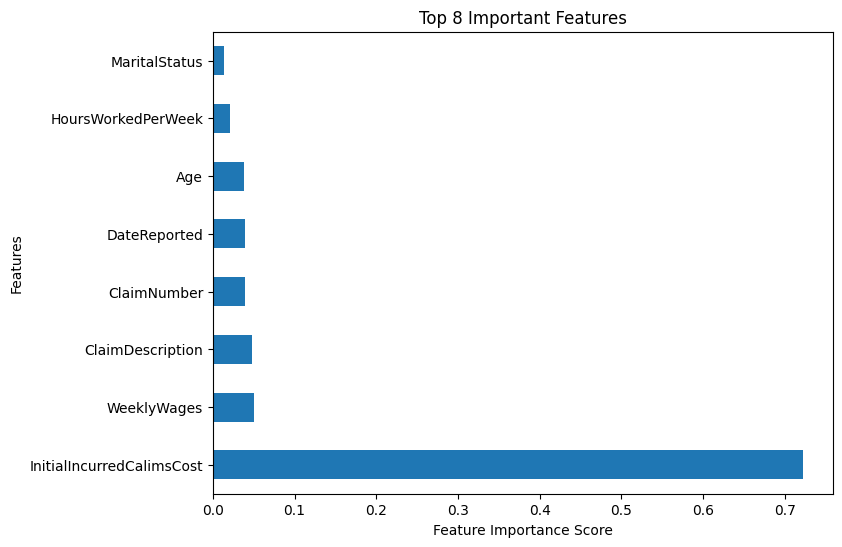

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# if you used 'pred' for features
feat_importances = pd.Series(model.feature_importances_, index=pred.columns)

feat_importances.nlargest(8).plot(kind='barh', figsize=(8,6))
plt.title("Top 8 Important Features")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()


In [72]:
imp_features=['ClaimNumber', 'DateReported', 'Age','MaritalStatus','WeeklyWages','HoursWorkedPerWeek', 
             'ClaimDescription', 'InitialIncurredCalimsCost']
predictor=df[imp_features]
predictor

,ClaimNumber,DateReported,Age,MaritalStatus,WeeklyWages,HoursWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost
1,21024,5209,48,0,500.00,38.0,8789,1500
2,17294,3979,43,0,509.34,37.5,13249,5500
3,12658,2978,30,2,709.10,38.0,2341,1700
5,3368,972,36,0,377.10,38.0,10618,2800
6,17062,4208,50,0,200.00,38.0,14512,500
...,...,...,...,...,...,...,...,...
36171,12781,3050,21,1,456.00,38.0,2991,13000
36172,13276,3052,20,1,344.16,40.0,17208,1400
36174,17197,4270,52,0,204.87,20.0,10655,500
36175,8896,1864,28,0,730.87,38.0,4297,4000


### Min Max scaling

In [73]:
df_scale=pre.minmax_scale(predictor)
df_scale=pd.DataFrame(df_scale,columns=imp_features)
df_scale

,ClaimNumber,DateReported,Age,MaritalStatus,WeeklyWages,HoursWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost
0,0.822181,0.803238,0.555556,0.0,0.066569,0.059375,0.494988,0.087666
1,0.676313,0.613570,0.476190,0.0,0.067815,0.058594,0.746170,0.321598
2,0.495014,0.459214,0.269841,1.0,0.094464,0.059375,0.131843,0.099363
3,0.131712,0.149884,0.365079,0.0,0.050173,0.059375,0.597995,0.163694
4,0.667240,0.648882,0.587302,0.0,0.026547,0.059375,0.817301,0.029183
...,...,...,...,...,...,...,...,...
30532,0.499824,0.470316,0.126984,0.5,0.060699,0.059375,0.168450,0.760220
30533,0.519182,0.470625,0.111111,0.5,0.045779,0.062500,0.969137,0.081818
30534,0.672520,0.658443,0.619048,0.0,0.027197,0.031250,0.600079,0.029183
30535,0.347894,0.287433,0.238095,0.0,0.097368,0.059375,0.242003,0.233873


##### Split train and test

In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(predictor, response, test_size=0.3, random_state=0)

## Final Model

In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
rfr=RandomForestRegressor()

In [77]:
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
y_pred

array([2456.42762521, 7218.83015666, 2695.13997712, ..., 2303.08941961,
       5493.0353956 , 6263.87202286])

In [79]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


RMSE: 1651.4355182169


In [81]:
# Number of trees
n_estimators = [int(x) for x in np.linspace(100, 1200, 12)]

# Features considered at each split
max_features = ['sqrt', 'log2', None]   # removed 'auto'

# Depth, splits, leaves
max_depth = [int(x) for x in np.linspace(5, 30, 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}


In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor(random_state=42)

rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=random_grid,
    scoring='neg_mean_squared_error',
    n_iter=5,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

rf_random.fit(x_train, y_train)

print("Best Params:", rf_random.best_params_)
print("Best Score:", rf_random.best_score_)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Params: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 25}
Best Score: -2866990.606953158


The results given from considering the parameters obtained from the above Randomized search Cv were not better, hence ignored. 

# Reading and testing the built model on test data

In [83]:
test_data=pd.read_csv("Test_SJC.csv",usecols=imp_features)
test_data.head()

,ClaimNumber,DateReported,Age,MaritalStatus,WeeklyWages,HoursWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost
0,WC8476284,2002-05-13T00:00:00Z,38,M,500.00,40.00,STRUCK VALVES ABRASIONS LEFT LEG LACERATED LEFT INDEX FINGER,1000
1,WC2445024,1989-10-14T00:00:00Z,38,M,350.00,29.75,LIFTING PATIENT PAIN IN LOWER BACK LEG,3500
2,WC4566945,1994-05-17T00:00:00Z,24,S,487.50,38.00,LIFTING BOXES LOWER BACK BACK INJURY,7500
3,WC9911299,2006-01-07T00:00:00Z,21,S,431.62,40.00,STRUCK LADDER BRUISED RIGHT KNEE MUSCLE RIGHT,1000
4,WC9066190,2003-04-10T00:00:00Z,32,M,480.50,38.00,FELL OFF LADDER FRACTURE RIGHT WRIST,111077


In [84]:
 test_data.isnull().sum()

ClaimNumber                  0
DateReported                 0
Age                          0
MaritalStatus                7
WeeklyWages                  0
HoursWorkedPerWeek           0
ClaimDescription             0
InitialIncurredCalimsCost    0
dtype: int64

In [85]:
test_data.dtypes

ClaimNumber                   object
DateReported                  object
Age                            int64
MaritalStatus                 object
WeeklyWages                  float64
HoursWorkedPerWeek           float64
ClaimDescription              object
InitialIncurredCalimsCost      int64
dtype: object

In [86]:
df_scale.head()

,ClaimNumber,DateReported,Age,MaritalStatus,WeeklyWages,HoursWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost
0,0.822181,0.803238,0.555556,0.0,0.066569,0.059375,0.494988,0.087666
1,0.676313,0.613570,0.476190,0.0,0.067815,0.058594,0.746170,0.321598
2,0.495014,0.459214,0.269841,1.0,0.094464,0.059375,0.131843,0.099363
3,0.131712,0.149884,0.365079,0.0,0.050173,0.059375,0.597995,0.163694
4,0.667240,0.648882,0.587302,0.0,0.026547,0.059375,0.817301,0.029183


In [87]:
test_data.columns

Index(['ClaimNumber', 'DateReported', 'Age', 'MaritalStatus', 'WeeklyWages',
       'HoursWorkedPerWeek', 'ClaimDescription', 'InitialIncurredCalimsCost'],
      dtype='object')

In [88]:
 test_data['MaritalStatus'] = test_data['MaritalStatus'].fillna('U')

In [89]:
label_encoder=pre.LabelEncoder()
test_data['ClaimNumber']=label_encoder.fit_transform(test_data['ClaimNumber'])
test_data['ClaimNumber']=label_encoder.fit_transform(test_data['ClaimNumber'])
test_data['DateReported']=label_encoder.fit_transform(test_data['DateReported'])
test_data['MaritalStatus']=label_encoder.fit_transform(test_data['MaritalStatus'])
test_data['ClaimDescription']=label_encoder.fit_transform(test_data['ClaimDescription'])

In [94]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

def preprocess_test_data(test_data):
    # Fill missing categorical values
    test_data['MaritalStatus'] = test_data['MaritalStatus'].fillna('U')
    
    # Encode categorical columns
    label_encoder = LabelEncoder()
    cat_cols = ['ClaimNumber', 'DateReported', 'MaritalStatus', 'ClaimDescription']
    for col in cat_cols:
        test_data[col] = label_encoder.fit_transform(test_data[col].astype(str))
    
    # Scale all numerical columns
    scaler = MinMaxScaler()
    test_data[test_data.columns] = scaler.fit_transform(test_data)
    
    return test_data


In [95]:

test_data = pd.read_csv("Test_SJC.csv", usecols=imp_features)

# Preprocess
test_processed = preprocess_test_data(test_data)


In [96]:

y_pred = rfr.predict(test_processed)

# Store results in a dataframe
results = pd.DataFrame({
    'Prediction_ID': test_data.index,
    'Predicted_UltimateIncurredClaimCost': y_pred
})

# Save predictions for submission or analysis
results.to_csv("test_predictions.csv", index=False)

print("✅ Predictions saved to test_predictions.csv")


✅ Predictions saved to test_predictions.csv
